In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\ARIF\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ARIF\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ARIF\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
profile = pd.read_csv('profile.csv')
port = pd.read_csv('portfolio.csv')
trans = pd.read_csv('transcript.csv')

In [3]:
profile.head(2)

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0


In [4]:
port.head(2)

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0


In [5]:
trans.head(2)

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [6]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


In [7]:
profile.shape

(17000, 6)

In [8]:
port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [9]:
port.shape

(10, 7)

In [10]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [11]:
trans.shape

(306534, 5)

In [12]:
profile.drop('Unnamed: 0',axis=1, inplace=True)
port.drop('Unnamed: 0',axis=1, inplace=True)
trans.drop('Unnamed: 0',axis=1, inplace=True)

# Profile dataset

[Text(0.5, 1.0, 'Income distribution for Different Age')]

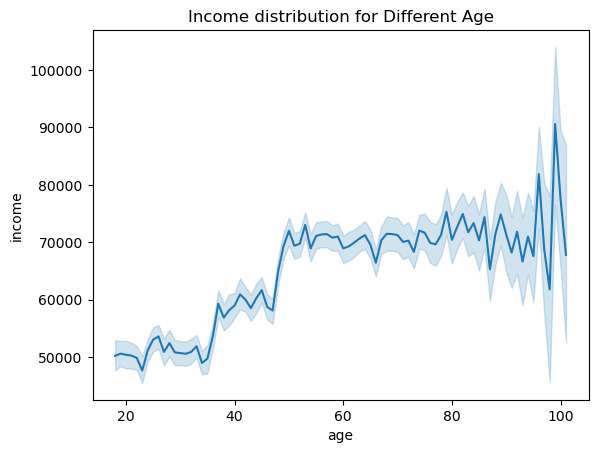

In [13]:
sns.lineplot(profile, x='age',y='income').set(title='Income distribution for Different Age')

#### comment: The above graph indicates that, age before 40 have less income which is the lowest

<Axes: xlabel='age', ylabel='income'>

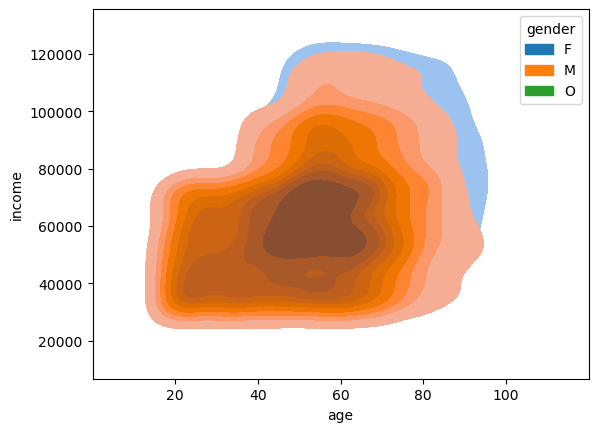

In [14]:
sns.kdeplot(data=profile, x="age", y="income", hue="gender", fill=True,)

#### comment : Female earn more than others

In [15]:
profile[(profile['age']>100)]
profile.drop(profile.index[(profile['age'] > 100)], inplace = True)

In [16]:
profile.head().reset_index()

,index,gender,age,id,became_member_on,income
0,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
1,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
2,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
4,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


In [17]:
profile.age.min()

18

In [18]:
profile.shape

(14820, 5)

In [19]:
profile.isnull().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

[Text(0.5, 1.0, 'Gender Distribution')]

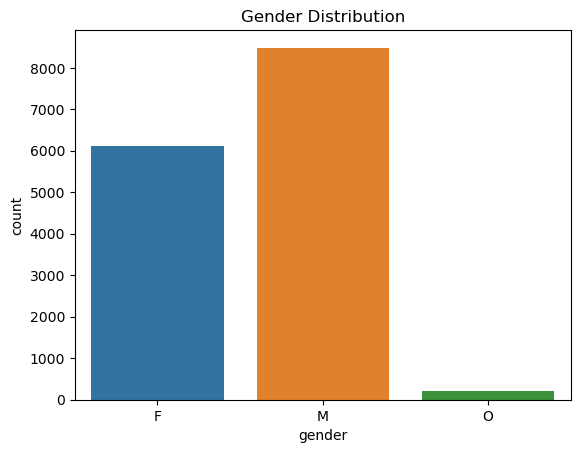

In [20]:
sns.countplot(data=profile, x='gender').set(title='Gender Distribution')

Text(0.5, 1.0, 'Gender Percentage')

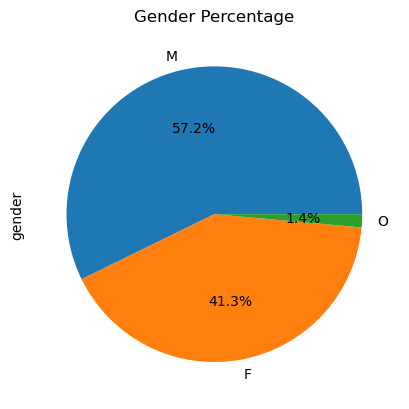

In [21]:
profile['gender'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Gender Percentage')

#### comment : Males are higher than others

[Text(0.5, 1.0, 'Income by Gender')]

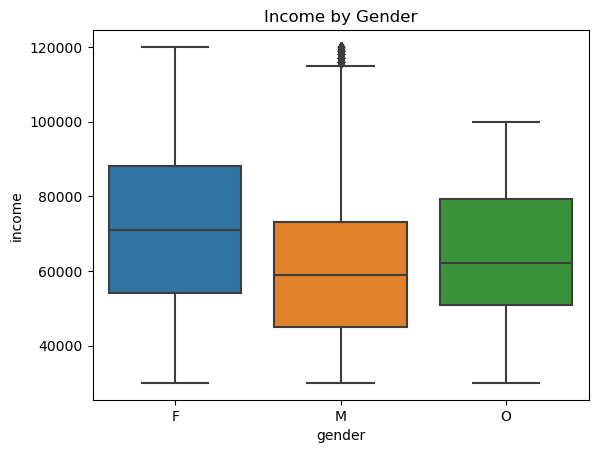

In [22]:
sns.boxplot(data=profile, y='income',x='gender').set(title='Income by Gender')

In [23]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'].astype(str), format='%Y%m%d')

In [24]:
profile.dtypes

gender                      object
age                          int64
id                          object
became_member_on    datetime64[ns]
income                     float64
dtype: object

In [25]:
profile.corr()

,age,income
age,1.00000,0.30702
income,0.30702,1.00000


In [26]:
profile['Year'] = profile['became_member_on'].dt.year
profile['Month'] = profile['became_member_on'].dt.month
profile['Day'] = profile['became_member_on'].dt.day_name()

In [27]:
profile.head(2)

,gender,age,id,became_member_on,income,Year,Month,Day
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,Saturday
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,Tuesday


In [28]:
profile['Membership_since_days'] = (pd.to_datetime('today') - profile['became_member_on']).astype('timedelta64[D]').astype(int)

In [29]:
profile.head(2)

,gender,age,id,became_member_on,income,Year,Month,Day,Membership_since_days
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,Saturday,2215
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,Tuesday,2282


In [30]:
print(profile['age'].describe())

count    14820.000000
mean        54.377800
std         17.365541
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        100.000000
Name: age, dtype: float64


##### comment : The average age is 54 where minimum is 18 and maximum is 100

In [31]:
profile['Age_categories'] = pd.cut(profile['age'],
                                   bins=[17,20,40,60,80,101],
                                   labels =['Teenage','Young-age','Middle-age','Old','Very-old']
                                  )

In [32]:
profile.head()

,gender,age,id,became_member_on,income,Year,Month,Day,Membership_since_days,Age_categories
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7,Saturday,2215,Middle-age
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5,Tuesday,2282,Old
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,4,Thursday,1930,Old
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,2018,2,Friday,2006,Old
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,2017,11,Saturday,2096,Middle-age


[Text(0.5, 1.0, 'Gender Distribution by Age')]

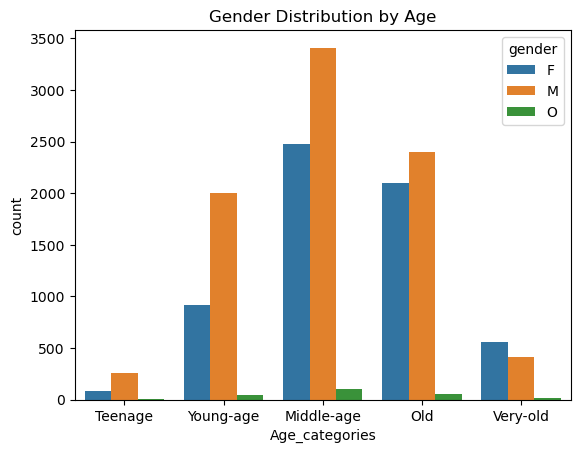

In [33]:
sns.countplot(data=profile,x='Age_categories',hue='gender').set(title='Gender Distribution by Age')

Text(0.5, 1.0, 'Age Groups Percentage')

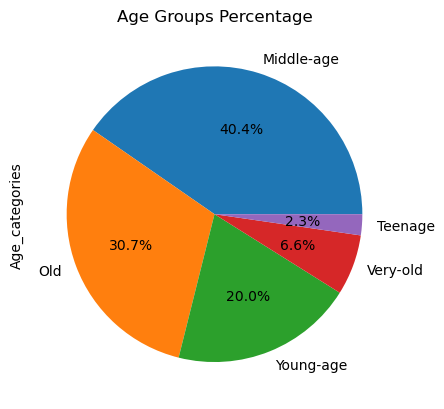

In [34]:
profile['Age_categories'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.title('Age Groups Percentage')

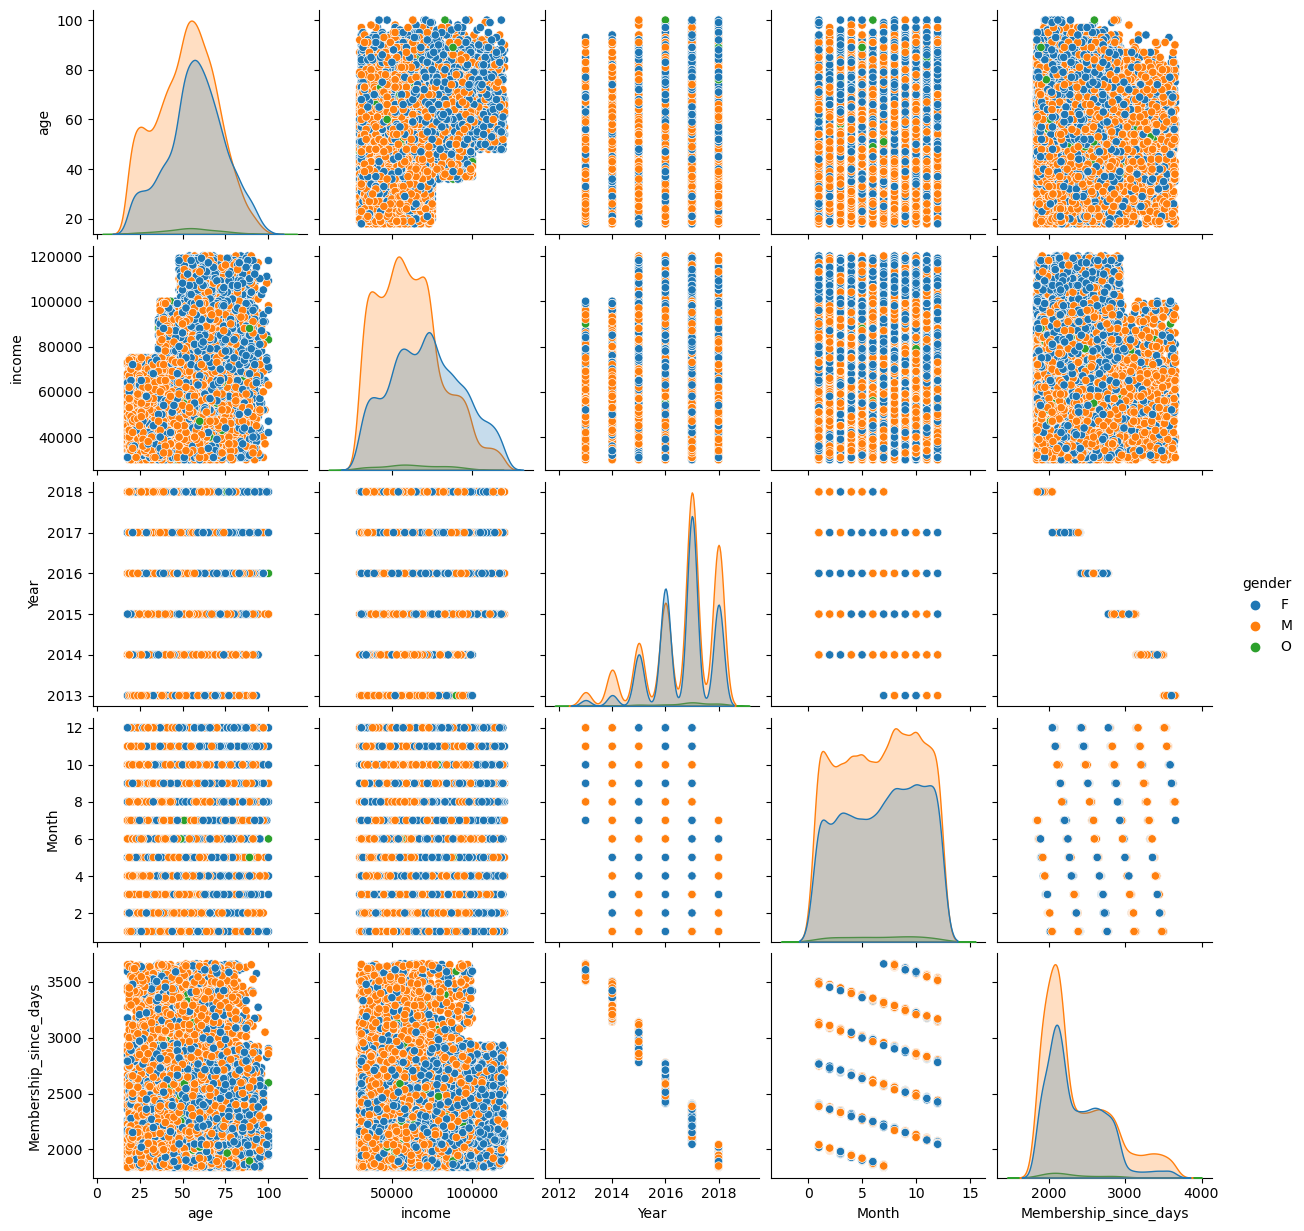

In [35]:
sns.pairplot(data=profile,hue='gender')

In [36]:
profile['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

[Text(0.5, 1.0, 'Members joining Frequency per Year')]

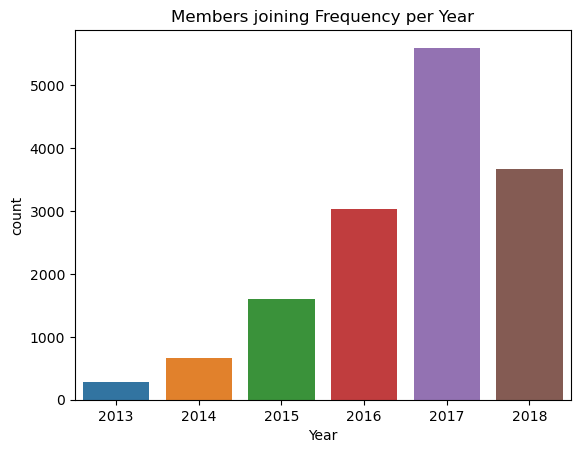

In [37]:
sns.countplot(data=profile, x='Year').set(title='Members joining Frequency per Year')

#### comment : Highest members joined in 2017 though next year, in 2018, the members decreased.
#### note : In 2018, it counted only first 7 months

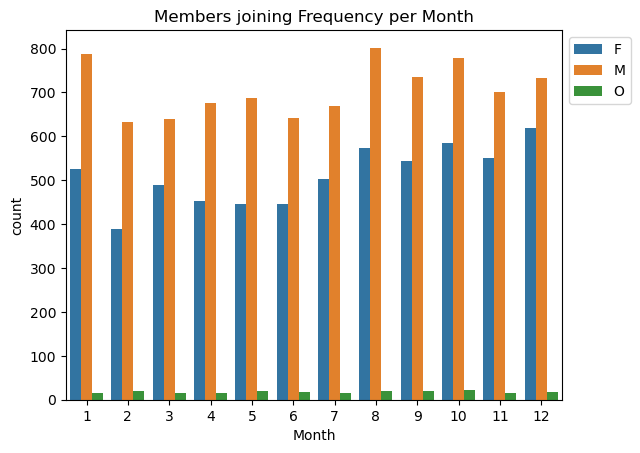

In [38]:
sns.countplot(data=profile, x='Month',hue='gender').set(title='Members joining Frequency per Month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

#### comment : January & August listed top for male to become members but in case of female it's December

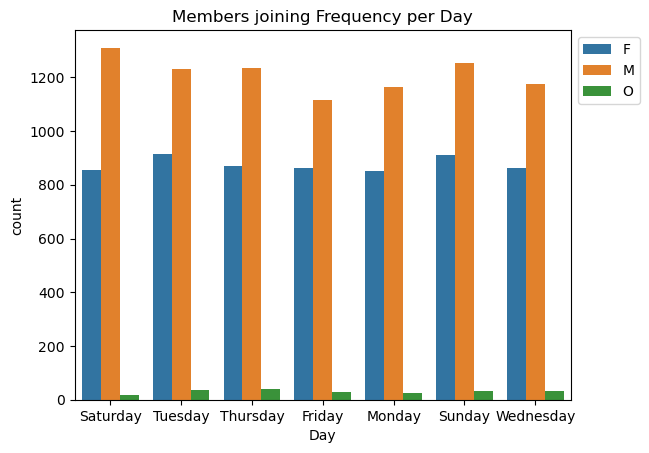

In [39]:
sns.countplot(data=profile, x='Day',hue='gender').set(title='Members joining Frequency per Day')
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

#### comment : Saturday is the best for male members to become members, for female it's Sunday and Thursday

## Portfolio

In [40]:
port.sample(2)

,reward,channels,difficulty,duration,offer_type,id
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4


In [41]:
port = port.set_index('id')


[Text(0.5, 1.0, 'Correlation among the parameters')]

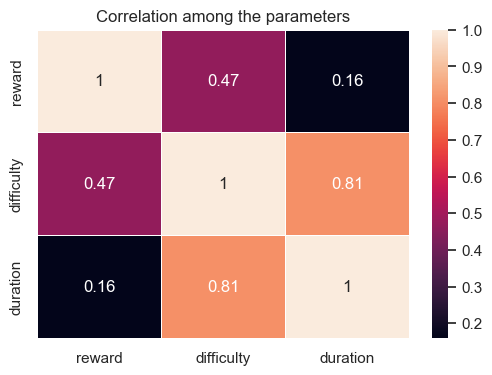

In [68]:
plt.figure(figsize = (6,4))
sns.heatmap(port.corr(),annot=True,linewidths=.5).set(title='Correlation among the parameters')

#### comment : difficulty & duration are highly correlated

In [43]:
port['difficulty'].max()

20

Text(0.5, 1.0, 'Different Offers from STARBUCKS')

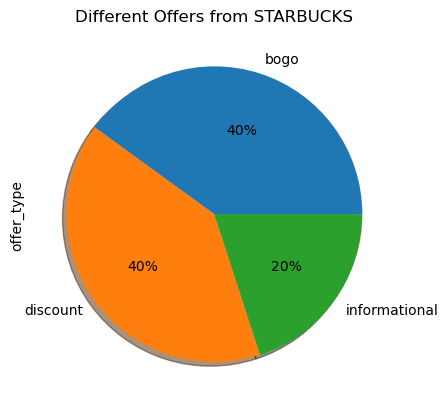

In [44]:
port['offer_type'].value_counts().plot(kind='pie', shadow=True, autopct ='%.0f%%')
plt.title('Different Offers from STARBUCKS')

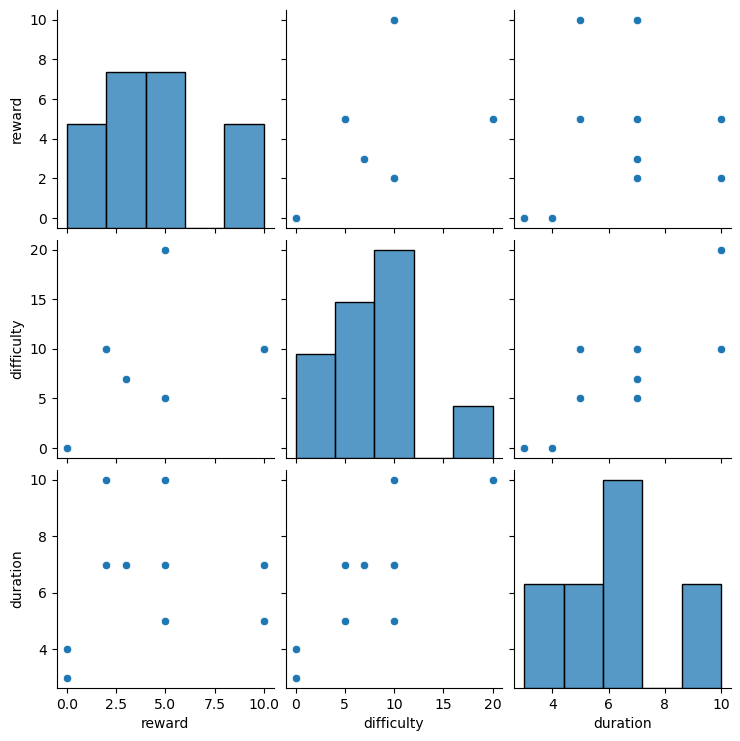

In [45]:
sns.pairplot(data=port)

## Transcript

In [46]:
trans.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [47]:
trans.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [48]:
trans.shape

(306534, 4)

In [61]:
trans['event'].nunique()

4

<Axes: xlabel='event', ylabel='count'>

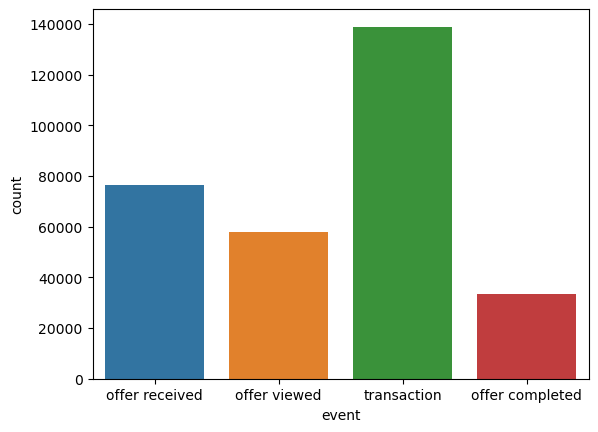

In [50]:
sns.countplot(data=trans,x='event')

In [51]:
trans['event'].nunique()

4

In [69]:
trans['event'].value_counts(normalize=True)

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

In [53]:
trans['time'].max()

714

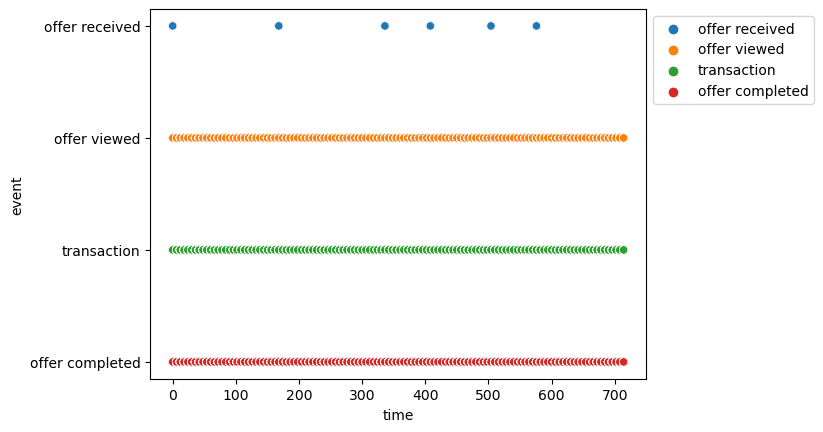

In [54]:
sns.scatterplot(data=trans, x='time',y='event',hue='event')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [55]:
trans['Hours_since_start'] = pd.cut(trans['time'],
                                   bins=[0,100,200,300,400,500,600,700,800],
                                   labels =['0-100hours','100-200hours','200-300hours','300-400hours',
                                            '400-500hours','500-600hours','600-700hours','700-800hours'],
                                    include_lowest=True
                                  )

In [56]:
trans.head(2)

,person,event,value,time,Hours_since_start
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,0-100hours
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,0-100hours


[Text(0.5, 1.0, 'Hours frequency')]

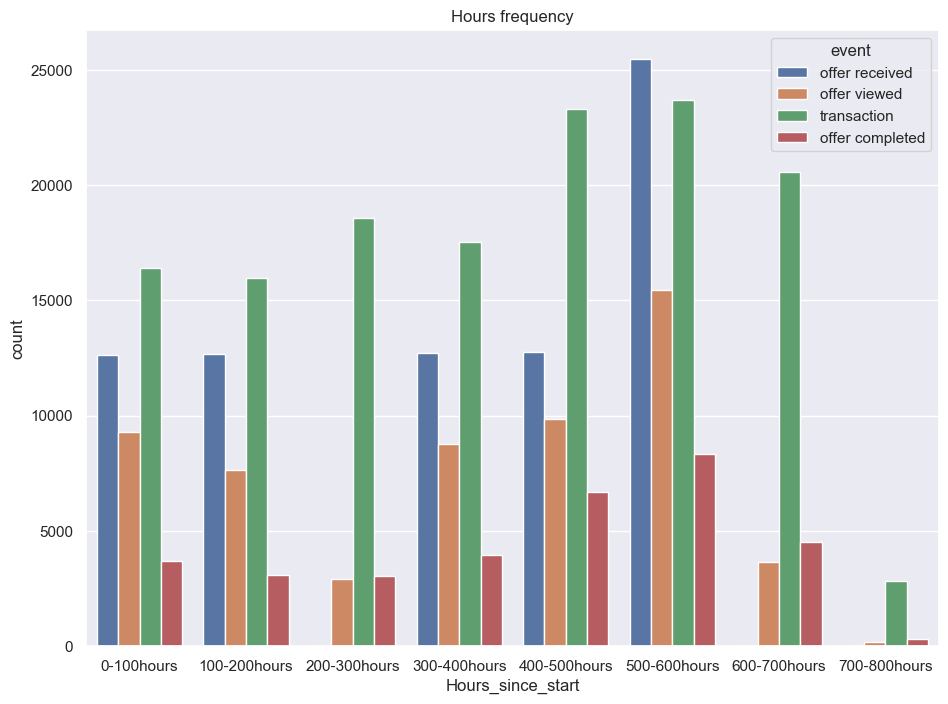

In [57]:
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(data=trans, x='Hours_since_start',hue='event').set(title='Hours frequency')

#### comment : Between 500-600 hours most offer received by customers & at the same time most transactions happened also. There was nobody who received the offer from 600 hours to 800 hours along with 200-300 hours.

Text(0.5, 1.0, 'Different Offers from STARBUCKS')

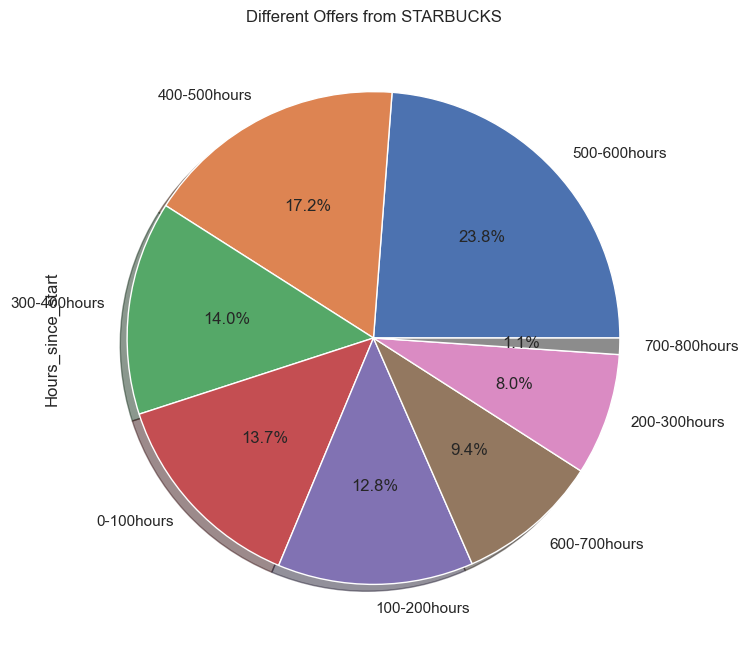

In [58]:
trans['Hours_since_start'].value_counts().plot(kind='pie', shadow=True, autopct ='%.1f%%')
plt.title('Different Offers from STARBUCKS')

### Thank you